#  Failure Analysis

In [1]:
# to get in-line plots
import matplotlib.pyplot as plt
from bioinfokit.analys import stat

import pandas as pd
import numpy as np
import scipy as sp

title_pad = 20
title_dim = 'xx-large'
xy_label_pad = 10
xy_label_dim = 'large'
fig_size = (18, 8)

fig_bg_color = 'w'
fig_dpi = 500
fig_bbox = 'tight'
fig_pad = .3
fig_formats = ['png', 'pdf']


def savefigure(figtitle):
    for fig_format in fig_formats:
        plt.savefig('figures/' + fig_format + '/' + figtitle + '.' + fig_format,
                    facecolor=fig_bg_color, dpi=fig_dpi, bbox_inches=fig_bbox, pad_inches=fig_pad)


## Import Data
Load the data from a .csv file


In [2]:
filename = "nDCG@5_All_Runs.csv"

#load the data
df = pd.read_csv(filename, sep = ',')

df

#Retrieve data
df.drop(df.tail(1).index,inplace=True)

## BM25 with Synonyms

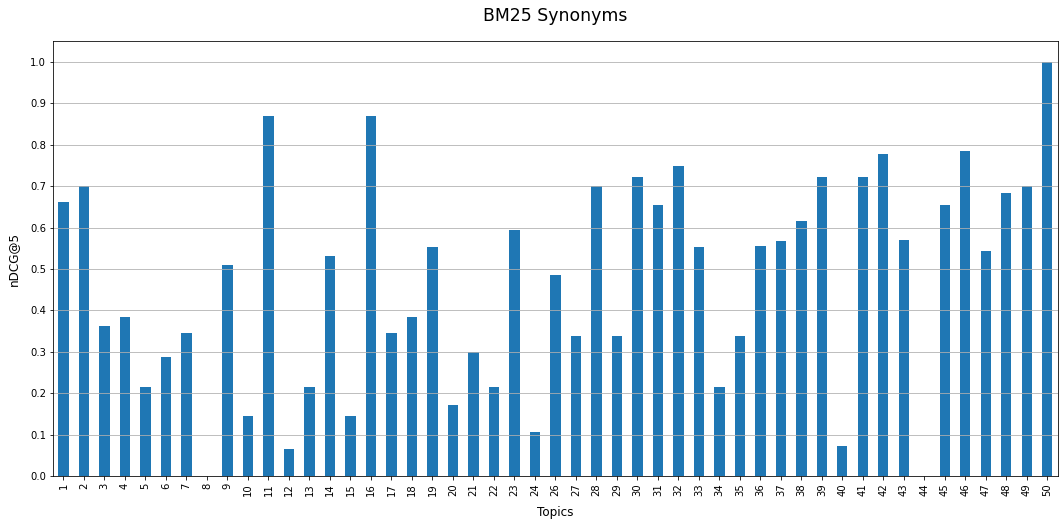

In [3]:
# Set size
plt.rcParams["figure.figsize"] = fig_size

#Bar plot
df.plot(kind='bar',x='Topic',y='Bm25 Synonyms Best',legend=None)
axes = plt.gca()
axes.yaxis.grid()
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.xticks(fontsize=10, rotation=90)
plt.xlabel('Topics', labelpad=xy_label_pad, fontsize=xy_label_dim)
plt.ylabel('nDCG@5', labelpad=xy_label_pad, fontsize=xy_label_dim)
plt.title("BM25 Synonyms", fontsize=title_dim, pad=title_pad)

savefigure('BM25_Synonyms_Failure')
plt.show()


As a starting point, we analyze the best run with BM25 and synonyms (Fig. x) and generally speaking we can affirm that BM25 performances are worse than the ones based on LMDirichlet. As we can see, this run registered a very low score in some topics and if we set aside topic 44 and 12 (where all the runs under-performed), we can focus our analysis on topic 8 and 40.

In the first case, after reading the top 5 documents retrieved by this run, we can notice the trend to retrieve documents with short and not logical premises. Indeed,the phrases are short and it is not present a train of thought that make the argument a strong one. Moreover, if we compare these results with the top 5 of runs with LMDirichlet (which scored 1) the difference of argument quality is sparkly clear. 

The trend to retrieve document with short premises is even more apparent if we look at topic 40, where 4 out of 5 results are documents that consist only of two or three lines. Furthermore, they are basically responses to opponents and so they have short and straight-forward premises, very poor from the argumentative and dialectical sides. As we will see later, these statements are also valid for the best run with BM25.

## LMDirichlet with Synonyms

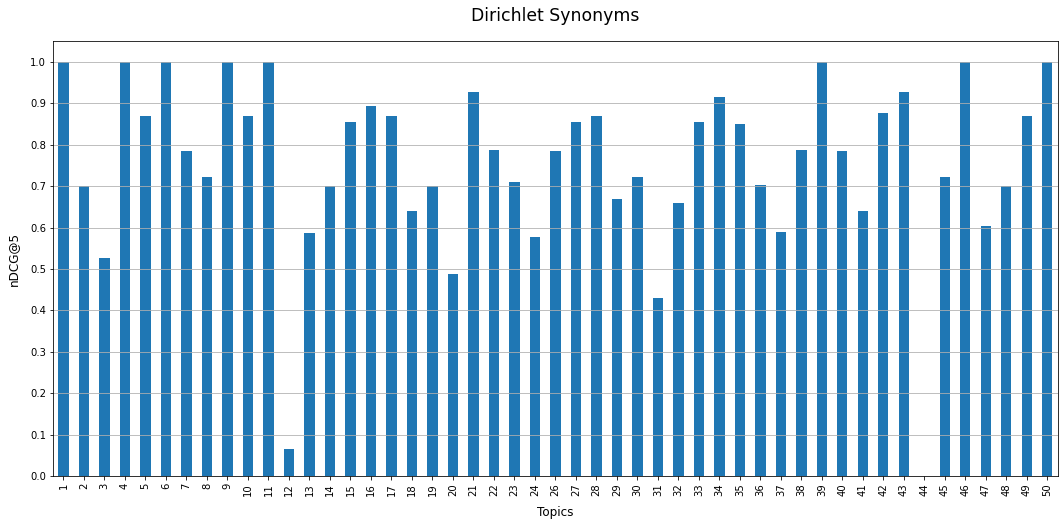

In [4]:
# Set size
plt.rcParams["figure.figsize"] = fig_size

#Bar plot
df.plot(kind='bar',x='Topic',y='Dirichlet Synonyms Best',legend=None)
axes = plt.gca()
axes.yaxis.grid()
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.xticks(fontsize=10, rotation=90)
plt.xlabel('Topics', labelpad = xy_label_pad, fontsize = xy_label_dim)
plt.ylabel('nDCG@5', labelpad=xy_label_pad, fontsize=xy_label_dim)
plt.title("Dirichlet Synonyms", fontsize=title_dim, pad=title_pad)

savefigure('Dirichlet_Synonyms_Failure')
plt.show()


Then, analyzing the the best run with LMDirichlet and synonyms (Fig.x), we can notice that these results are quite similar to the best run obtained with LMDirichlet(Fig.x). In particular, this run scores better result than  the other with LMDirichlet in the following topics: 23, 32, 34, 35, 42 and 47; but on the other hand, scores a slightly lower result in more other topics. For example, in topic 40 there is a relevant gap between this run and the best one with LMDirichlet because this run retrieved a document not present in the qrels. The same is also valid for topic 8: two documents retrieved using and synonyms are not present in the qrels.

## Best BM25

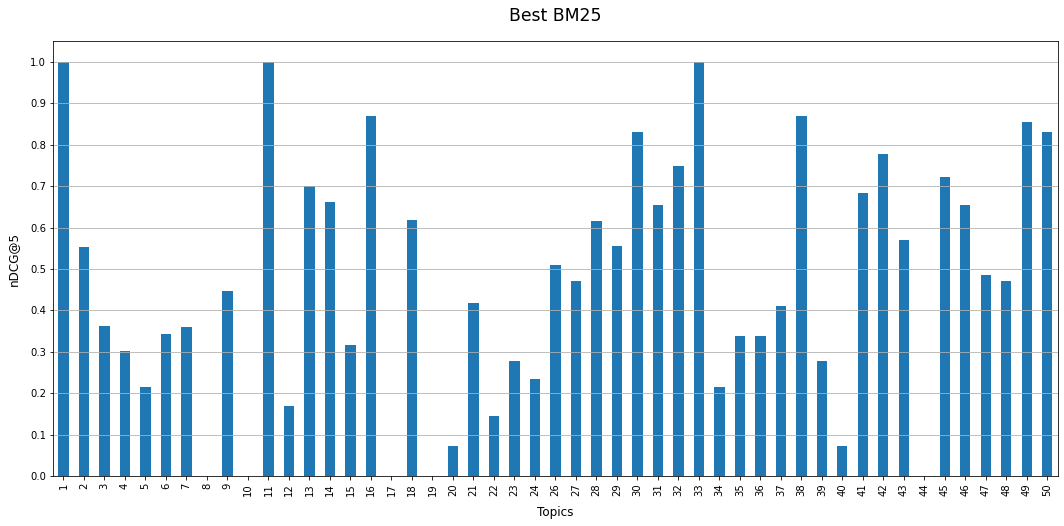

In [5]:
# Set size
plt.rcParams["figure.figsize"] = fig_size

#Bar plot
df.plot(kind='bar',x='Topic',y='Bm25 Weights Best',legend=None)
axes = plt.gca()
axes.yaxis.grid()
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.xticks(fontsize=10, rotation=90)
plt.xlabel('Topics', labelpad = xy_label_pad, fontsize = xy_label_dim)
plt.ylabel('nDCG@5', labelpad=xy_label_pad, fontsize=xy_label_dim)
plt.title("Best BM25", fontsize=title_dim, pad=title_pad)

savefigure('BM25_Best_Failure')
plt.show()


In Fig. x we report the scores for the best run with BM25. The performances of this run are quite the same as the ones registered by BM25 using synonyms (Fig. x).  However, this run failed more topics than all the others, such as topic 19, for which this run scored 0 while the others scores are above the average of each run.  Going deeper in the analysis, we can see that the top 5 documents retrieved by this run for topic 19 are related to it but totally lack of arguments. Indeed, three documents are responses to opponents and so they don’t provide useful information, while the other two documents contain only some general considerations about the debate.

## Best LMDirichlet 

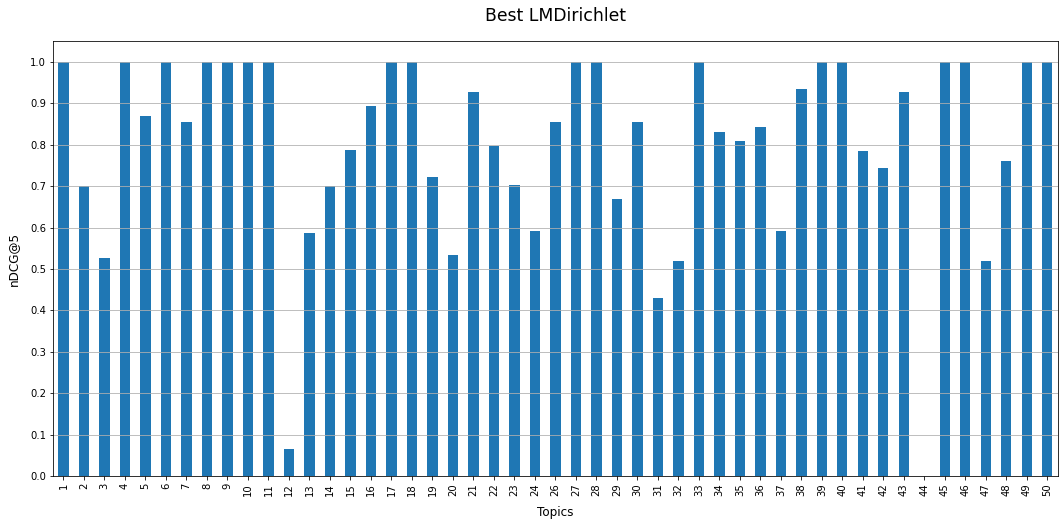

In [6]:
# Set size
plt.rcParams["figure.figsize"] = fig_size

#Bar plot
df.plot(kind='bar',x='Topic',y='Dirichlet Weights Best',legend=None)
axes = plt.gca()
axes.yaxis.grid()
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.xticks(fontsize=10, rotation=90)
plt.xlabel('Topics', labelpad=xy_label_pad, fontsize=xy_label_dim)
plt.ylabel('nDCG@5', labelpad = xy_label_pad, fontsize = xy_label_dim)
plt.title("Best LMDirichlet", fontsize=title_dim, pad=title_pad)

savefigure('Dirichlet_Best_Failure')
plt.show()


Finally, we analyze the best run wit hLMDirichlet (Fig. x), which is the best among all the runs we produced. The two worst scores are for topic 44 and 12, as for the other runs. In the first case, topic 44 title is "Should election day be a national holiday?" and it is possible to notice that only two documents are judged as highly relevant in the qrels (one of these has a very short premise). We can also observe that in both documents the word "election" is often replaced by "voting day" or "pooling day". All the top 5 document retrieved by the run are debates about a specific or possible holiday, such as "Columbus Day Should Not be Celebrated", but they lack of the "election part". Instead for what concerns topic 12, which title is "Should birth control pillsbe available over the counter?", we can see that the top 5 documents are about "birth control" but they describes only a general approach and don’t give useful information for the requested topic. Furthermore, in all of these documents, the words "birth control" are repeated very often.